# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

## Group Composition

- Ulisses Ferreira – 4561
- Fernando Silva – 9950
- Rafael Silva – 21089

# Project Overview

## Purpose of the Project

The primary goal of this project is to develop a predictive model that utilizes machine learning to estimate the risk of athletic injuries. Injuries in sports can lead to significant setbacks for athletes, ranging from short-term impact on performance to career-ending damage. Predicting these injuries can be a pivotal step in preventative care, allowing for timely interventions, informed decision-making regarding training and health management and if a team should invest in a certain player or not.

### Problem Description

In the realm of professional sports, particularly football, injuries represent a major concern for players, coaches, and management teams alike. The occurrence of an injury can alter the trajectory of a player's career, impact team performance, and impose substantial financial burdens on sports organizations. Thus, a predictive model that can estimate the risk of injuries with reasonable accuracy has major implications.

The problem at hand is twofold:
1. **Prediction Accuracy**: Developing a model that can accurately predict the likelihood of injuries based on historical data and player profiles. The challenge lies in the ability to discern and weigh the myriad of contributing factors that lead to injuries.
2. **Preventive Action**: Translating predictive insights into actionable strategies. Prediction alone is not the end goal; the ultimate value of this model is derived from its ability to inform preventive measures and interventions.

Additionally, there are inherent complexities in predicting sports injuries, such as:
- The multifactorial nature of injuries where both intrinsic (e.g., genetics, age, fitness level) and extrinsic (e.g., playing surface, weather conditions) factors play a role.
- The dynamic and unpredictable nature of sports events where unquantifiable elements, such as accidental collisions or unexpected player movements, can lead to injuries.

This project seeks to address these challenges by applying machine learning techniques to historical injury data, with the aim of unveiling patterns and correlations that can be used to forecast injuries. By doing so, the project will not only contribute to the strategic planning for teams and the athletic development of players but also promote the broader goal of enhancing safety in sports.

### Objectives
- Analyze the `injury_data.csv` dataset to identify factors that are indicative of a higher risk of injury.
- Preprocess the data to format it suitably for analysis, ensuring that it accurately reflects the conditions under which the injuries occur.
- Explore the dataset through visual and statistical methods to understand the relationships and patterns within the data.
- Apply various machine learning algorithms to predict injury likelihood, leveraging patterns found in the athletes' age, weight, height, previous injuries, training intensity, and recovery time.
- Evaluate and compare the performance of different models based on their accuracy and other relevant metrics, selecting the best-performing model for potential deployment.

The outcome of this project will provide valuable insights into injury prevention, which could be used by sports professionals, coaches, and health practitioners to reduce the risk of injuries and enhance athletes' well-being and career longevity.

### Project Scope

The project is dedicated to predict sports injuries, with a particular focus on football players. Utilizing data spanning from seasons 2018-2020, the analysis will concentrate on correlating player statistics and game conditions with the incidence of injuries.

Key delimitations of the project include:

- **Sport Specificity**: While the methodologies developed could be applicable to other sports, this project will exclusively analyze football injuries, acknowledging the unique demands and injury patterns of the sport.

- **Data Limitation**: The predictions will be based on available quantitative data, such as player age, weight, height, previous injury history, training intensity, and recovery time. 

- **Injury Type**: The project will address the prediction of injuries as a general category and will not differentiate between types of injuries.

- **Non-medical Approach**: The predictive model is designed to identify risk factors and is not meant to diagnose, treat, or offer medical advice on injuries.

- **Temporal Range**: The dataset includes records from specific seasons (2018-2020), and therefore, the findings will be most applicable to this period. Evolving training techniques, game rules, or player behaviors beyond this timeframe may influence injury patterns and risk.

- **External Factors**: The scope will not extend to the analysis of external factors such as game strategies, team dynamics, or psychological factors unless quantifiable data regarding these aspects are available in the dataset.

By setting these boundaries, the project aims to create a focused predictive model that leverages statistical analysis to contribute to the field of injury prevention in football. It provides a structured framework for handling the complex nature of injury prediction while clarifying the extents and limitations of the analysis.

# Software and Libraries

## Import Libraries

This project utilizes a range of Python libraries for data manipulation, visualization, and machine learning tasks. 

- `pandas`: Essential for data manipulation and analysis. Used for its robust data structures and to work with our dataset.
- `numpy`: Provides support for numerical and array operations, which are widely used in data processing and model formulation.
- `matplotlib`: A foundational library for creating static, interactive, and animated visualizations in Python.
- `seaborn`: Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
- `scikit-learn`: This library offers simple and efficient tools for predictive data analysis. It is used for model building, evaluation, and providing a range of supervised and unsupervised learning algorithms.
- `ipywidgets`: A library that offers interactive HTML widgets for Jupyter notebooks, making it possible to create interactive user interfaces directly in the notebook environment. With widgets, you can craft dynamic inputs that enable real-time interaction with your data and models.
- `display`: A function from the IPython.display module, crucial for rendering widgets in the Jupyter notebook. It is used to show or update widgets inline.
- `clear_output`: Also from the IPython.display module, this function is used to clear the output of a cell. It's particularly useful when you want to refresh the results displayed by a widget, such as updating the classification output when a user interacts with sliders or presses a button.

The versions of these libraries are important to ensure consistency in results when the project is replicated or reviewed in the future. Below, we display the versions used in this project.

In [1]:
# Import the necessary libraries and print their versions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     StratifiedKFold, GridSearchCV)
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, 
                                   PolynomialFeatures)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from ipywidgets import widgets
from IPython.display import display, clear_output

# Printing versions
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {plt.matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scikit-learn version: {skl.__version__}")

pandas version: 2.0.3
numpy version: 1.24.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
scikit-learn version: 1.3.0


# Dataset

## Overview

This section focuses on the `injury_data.csv` dataset, which contains information about athletes and their injury records. The features included in the dataset are as follows:

- `Player_Age`: The age of the player in years.
- `Player_Weight`: The weight of the player in kilograms.
- `Player_Height`: The height of the player in centimeters.
- `Previous_Injuries`: The number of previous injuries the player has had.
- `Training_Intensity`: A numerical value representing the intensity of the player's training regimen.
- `Recovery_Time`: The amount of time the player needs to recover from an exercise session, in days.
- `Likelihood_of_Injury`: A binary target variable where `1` indicates a higher likelihood of injury and `0` indicates a lower likelihood.

Understanding the features and their characteristics is crucial for the subsequent data preparation and modeling phases.

In [2]:
import pandas as pd

# Load the injury data from the CSV file
data_file_path = 'injury_data.csv'
df = pd.read_csv(data_file_path)

# Display the first few rows to get a preview of the data
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


Additionally, we will perform a preliminary assessment of the dataset, which includes:

- Observing the shape of the dataset to know the number of entries and features.
- Reviewing the data types to ensure they are appropriate for the features.
- Checking for any missing values that may require imputation.
- Providing a statistical summary of the features to understand their distribution.


In [3]:
# Display the shape of the dataset
df.shape

(1000, 7)

In [4]:
# Display data types of each feature
df.dtypes

Player_Age                int64
Player_Weight           float64
Player_Height           float64
Previous_Injuries         int64
Training_Intensity      float64
Recovery_Time             int64
Likelihood_of_Injury      int64
dtype: object

In [5]:
# Check for any missing values
missing_values = df.isnull().sum()
# Only display columns with missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [6]:
# Display a statistical summary of the dataset
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


Based on the outputs, the `injury_data.csv` dataset consists of 1000 entries, each with 7 features, and no missing values, which simplifies preprocessing as no imputation is required. The features are numerical and suitable for machine learning models. Players ages range from 18 to 39, with weights and heights suggesting a diverse athletic population. Training intensity and recovery times vary, indicating a mix of training regimens. The balanced nature of the 'Likelihood_of_Injury' target variable (mean of 0.5) is ideal for classification tasks, as there's an equal representation of both classes. Overall, the dataset is well-structured, providing a solid foundation for predictive analysis of injury likelihood based on physical attributes and training factors.

# Data Preparation

In this section, we will prepare our dataset for the modeling phase. This involves cleaning the data, handling missing values, encoding categorical variables, feature scaling, and any additional steps required to make the dataset suitable for use with machine learning algorithms.


##
The following preprocessing steps have been applied to the `injury_data.csv` dataset:

1. **Handling Missing Values**: Checking for missing values and applying appropriate methods to handle them, such as imputation or removal of rows/columns. (We had already verified that we have no missing values, but we will carry out this step in a purely academic sense.)
2. **Feature Engineering**: Creating new features that might help in improving model performance, like calculating the Body Mass Index (BMI) from weight and height.
3. **Data Type Conversion**: Ensuring that all data types are correct and converting any categorical variables into a format that can be provided to machine learning algorithms, if necessary.
4. **Feature Scaling**: Normalizing or standardizing numerical features so that they have a similar scale. This is important for models that are sensitive to the magnitude of variables, like SVM or k-nearest neighbors.
5. **Encoding Categorical Variables**: Applying one-hot encoding or label encoding to convert categorical variables into a machine-readable format.
6. **Splitting the Data**: Dividing the dataset into training and test sets to allow for the evaluation of the model's performance on unseen data.

Each step is crucial to ensure that the dataset is clean, and the variables are in the right form to be used by machine learning algorithms. Below are the Python code cells that perform these preprocessing tasks.

### Handling Missing values

In [7]:
print("Original data shape:", df.shape)
df.dropna(inplace=True)
print("New data shape after dropping missing values:", df.shape)

Original data shape: (1000, 7)
New data shape after dropping missing values: (1000, 7)


As we explained earlier, our results are the same because there were no missing values.

## Feature Engineering

In addition to basic features, we can derive new features that might capture complex interactions and nonlinear relationships between the existing variables. These new features can potentially provide more insights to the machine learning models. Here are the additional features engineered:

1. **BMI** The BMI is calculated using the formula:

\[ BMI = \frac{weight_{kg}}{(height_{m})^2} \]

where `weight_{kg}` is the player's weight in kilograms, and `height_{m}` is the player's height in meters squared. BMI provides a simple numeric measure of a person's thickness or thinness, allowing health professionals to discuss weight problems more objectively with their patients.

In our dataset, we will calculate the BMI for each player using their `Player_Weight` and `Player_Height` columns. This new feature, 'BMI', may provide additional insight into the relationship between a player’s physical characteristics and their likelihood of injury, which is the target variable we aim to predict.

In [8]:
# Calculate BMI and add it as a new feature in the dataframe
df['BMI'] = df['Player_Weight'] / (df['Player_Height']/100) ** 2
print("Feature 'BMI' added to the dataset.")

Feature 'BMI' added to the dataset.


2. **Age-BMI Interaction**: This feature is calculated using the formula:

\[ Age\_BMI\_Interaction = Player\_Age \times BMI \]

This feature is the product of a player's age and their BMI. Interaction terms can capture the effect of one feature depending on another feature, which may be the case if the impact of BMI on injury likelihood varies with age.

In [9]:
# Age - BMI interaction
df['Age_BMI_Interaction'] = df['Player_Age'] * df['BMI']

3. **Age Squared**: This feature is calculated using the formula:

\[ Age\_squared = Player\_Age^2 \]

This feature is the square of the player's age. Squaring a feature can help in modeling the nonlinear effects, capturing the accelerated increase or decrease in injury risk that might be associated with age.

In [10]:
# Age Squared
df['Age_squared'] = df['Player_Age'] ** 2

4. **BMI Squared**: This feature is calculated using the formula:

\[ BMI\_squared = BMI^2 \]

Similar to age, this is the square of the BMI value. It helps in capturing non-linear patterns and may indicate if the risk of injury increases more rapidly at higher levels of BMI.

In [11]:
# BMI Squared
df['BMI_squared'] = df['BMI'] ** 2

5. **Training-Recovery Ratio**: This feature is calculated using the formula:

\[ Training\_Recovery\_Ratio = \frac{Training\_Intensity}{Recovery\_Time} \]

This feature is the ratio of training intensity to recovery time. It represents how intense the training is relative to the amount of recovery time a player has. A high ratio might indicate a higher risk of injury due to inadequate recovery time.

>*Note: We replace a recovery time of zero with `nan` to avoid division by zero errors. This is based on the assumption that a recovery time of zero is not possible and likely indicates missing or incorrect data.*

In [12]:
# Training Recovery Ratio
df['Training_Recovery_Ratio'] = df['Training_Intensity'] / df['Recovery_Time'].replace(0, np.nan)

Each of these features is designed to bring additional dimensionality to our analysis, potentially improving the predictive power of our models.


We need to ensure that the numerical features `Player_Weight`, `Player_Height`, and `Training_Intensity` are rounded to two decimal places for consistency and to prevent issues that might arise from floating-point representation.

In [13]:
# Rounding numerical features to two decimal places for consistency
df['Player_Weight'] = df['Player_Weight'].round(2)
df['Player_Height'] = df['Player_Height'].round(2)
df['Training_Intensity'] = df['Training_Intensity'].round(2)

Continuing with the refinement of our dataset, we introduce an advanced step in feature engineering by segmenting players into distinct groups based on their Body Mass Index (BMI). These groupings are derived from established health guidelines and categorize BMI values into various levels, from 'Underweight' to 'Obesity II'. This categorization helps to provide a clearer picture of each player’s health status in relation to their body composition.

In [14]:
# Creating a new categorical variable "BMI_Classification" from the "BMI" feature
gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, float('inf')]
categories = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II']
df['BMI_Classification'] = pd.cut(df['BMI'], bins=gaps, labels=categories, right=False)

Additionally, we categorize players into distinct age brackets. This segmentation is designed to illuminate any age-related trends or influences on injury risk. By examining these age groups, we can delve into how age may correlate with the propensity for injuries.

In [15]:
# Grouping players into age categories to identify trends within different age groups
df["Age_Group"] = pd.cut(
    df["Player_Age"],
    bins=[18, 22, 26, 30, 34, df["Player_Age"].max()],
    labels=["18-22", "23-26", "27-30", "31-34", "35+"],
    include_lowest=True,
)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach for summarizing the main characteristics of a dataset, often with visual methods. It is a critical step to understand the data, identify patterns and anomalies, test a hypothesis, or check assumptions. The insights gained from EDA influence the choice of feature engineering and machine learning models.


## Objectives

We will undertake a comprehensive EDA of the `injury_data.csv` dataset, targeting the following objectives:

- Understand the distribution of key variables and how they relate to the likelihood of injury.
- Detect any outliers or anomalies in the data that could affect the model's performance.
- Examine the relationships between the features, especially how they correlate with the target variable, 'Likelihood_of_Injury'.
- Identify any potential bias in the data which may need to be addressed.

1. **Distribution of Players' Ages**: Understanding the age distribution of players can provide insights into the dataset's demographic and could have implications on injury likelihood.
2. **Players' Weight and Height**: Analyzing the distribution of the players' weight and height can reveal the physical characteristic distribution among the players.
3. **BMI Categories**: Reviewing the distribution of players across different BMI categories to understand the physical fitness diversity in the dataset.
4. **Training Intensity vs. Likelihood of Injury**: Investigating if there's a correlation between training intensity and the likelihood of injury.
5. **Recovery Time and Previous Injuries**: Looking at how recovery time and previous injuries relate to the likelihood of injury.
6. **Age Group Analysis**: Analyzing the distribution of injuries across different age groups.
7. **Correlations**: Understanding the inter-relationships between all the features, especially how they correlate with the likelihood of injury.
The knowledge gained from this analysis will not only provide a clearer picture of the factors contributing to injuries but also enrich the subsequent phases of feature selection and algorithm development.

These insights can help inform which features are most relevant for predicting injury likelihood and thus can guide the feature selection and modeling process.

### Distribution of Players' Ages

The age of players can be an important factor in injury prediction, as it may correlate with factors like recovery speed and injury prevalence. We will start by examining the distribution of players' ages in the dataset.

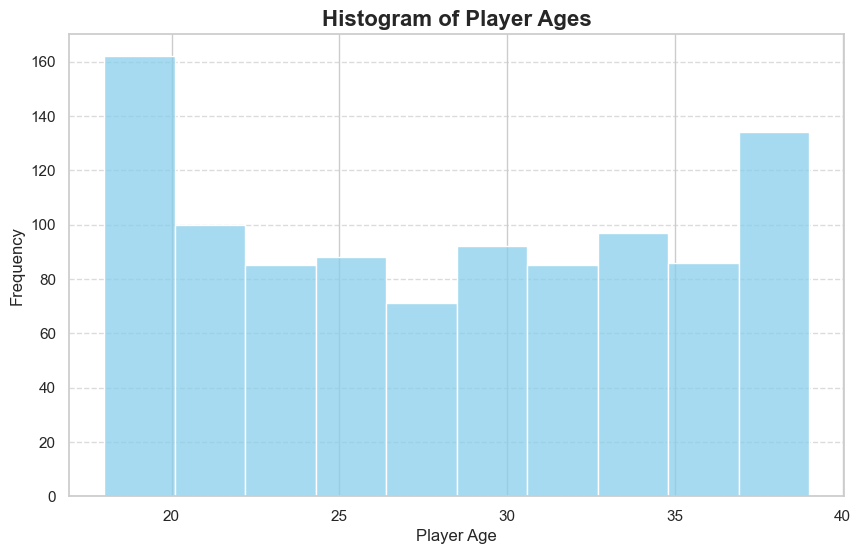

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Plot histogram of player ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Player_Age'], bins=10, kde=False, color='skyblue')
plt.title('Histogram of Player Ages', fontsize=16, fontweight='bold')
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Weight and Height Distribution of Players

Now we will look at the distribution of player weight and height. These physical characteristics are fundamental to athletic performance and could potentially be related to injury risks.

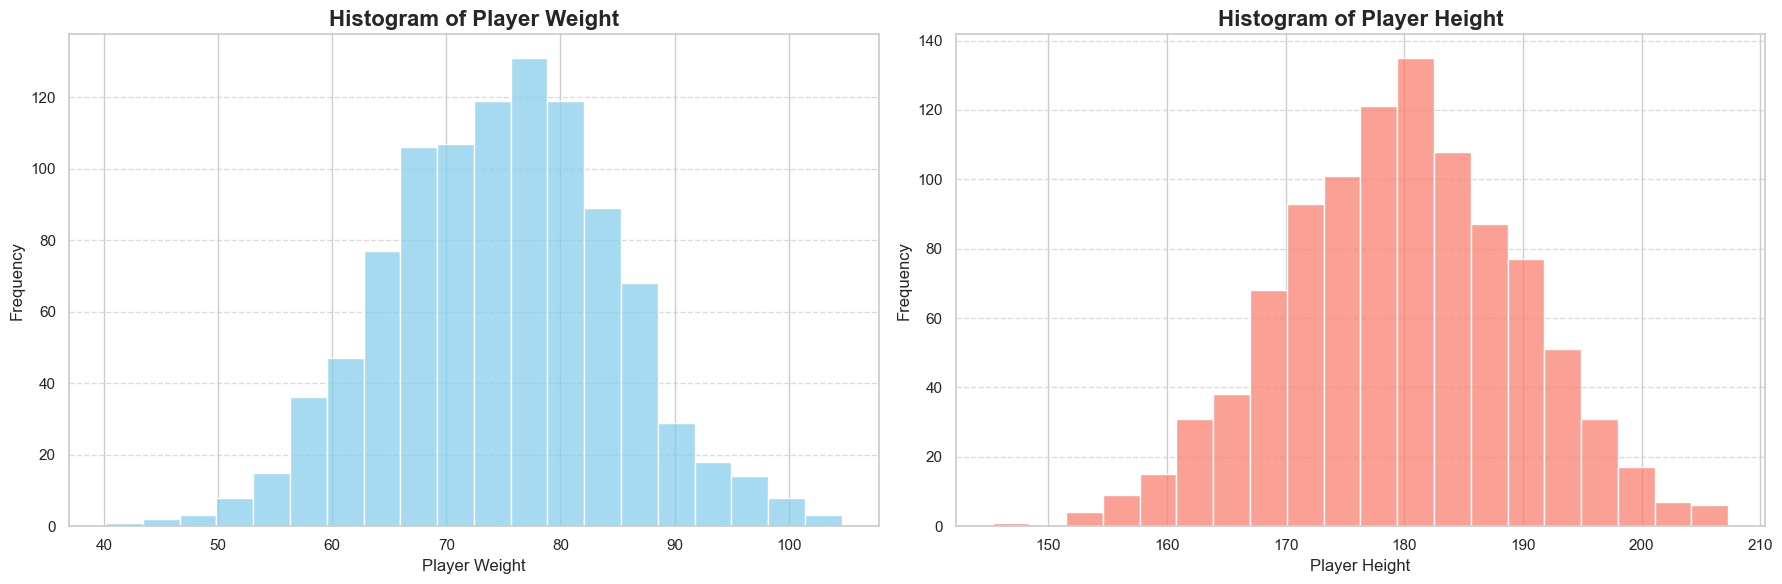

In [17]:
# Plot histograms of player weight and player height
plt.figure(figsize=(18, 6))

# Histogram of player weight
plt.subplot(1, 2, 1)
sns.histplot(df['Player_Weight'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Player Weight', fontsize=16, fontweight='bold')
plt.xlabel('Player Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram of player height
plt.subplot(1, 2, 2)
sns.histplot(df['Player_Height'], bins=20, kde=False, color='salmon')
plt.title('Histogram of Player Height', fontsize=16, fontweight='bold')
plt.xlabel('Player Height', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Analysis of Injury Distribution by Age Group

Understanding how the likelihood of injury and the history of previous injuries are distributed across different age groups can provide valuable insights into injury risk factors and prevention strategies. To this end, we will create two subplots:

Both subplots will provide a comparative view of how age influences the injury landscape within our dataset.

1. **Distribution of Likelihood of Injury for Each Age Group**: This visualization will help us determine if certain age groups are more prone to injuries, according to our data. A higher incidence in a specific age group might suggest a need for targeted preventive measures


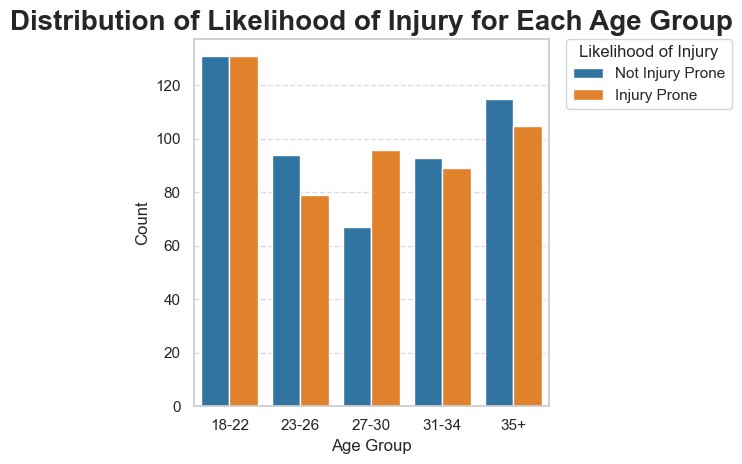

In [18]:
# Subplot for distribution of likelihood of injury for each age group
color_palette = {'Not Injury Prone': '#1f77b4', 'Injury Prone': '#ff7f0e'}
count_plot = sns.countplot(data=df, x='Age_Group', 
                           hue='Likelihood_of_Injury', 
                           order=['18-22', '23-26', '27-30', '31-34', '35+'],
                           palette=color_palette.values()
                           )
plt.title('Distribution of Likelihood of Injury for Each Age Group', fontsize=20, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
handles, _ = count_plot.get_legend_handles_labels()
labels = ['Not Injury Prone', 'Injury Prone']
plt.legend(handles, labels, title='Likelihood of Injury', 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

2. **Distribution of Previous Injuries for Each Age Group**: By analyzing the history of previous injuries within each age group, we can assess if past injuries are more common among certain age demographics. This might be indicative of the cumulative effects of sports and activities over time or recovery and resilience factors associated with different ages.

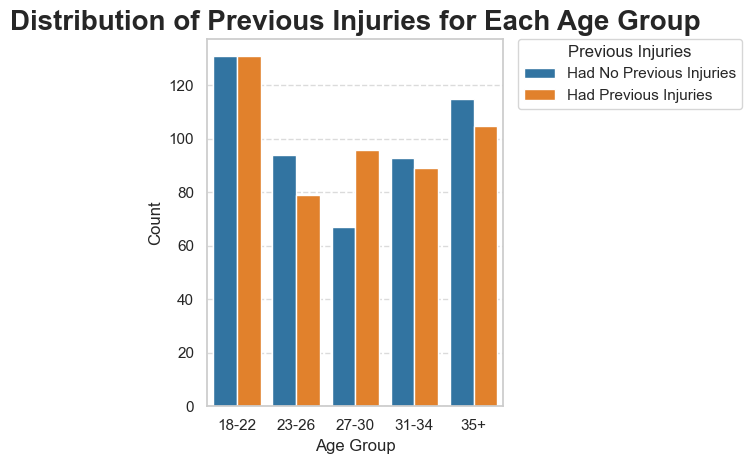

In [19]:
# Subplot for distribution of previous injuries for each age group
color_palette = {'Had No Previous Injuries': '#1f77b4', 'Had Previous Injuries': '#ff7f0e'}
count_plot = sns.countplot(data=df, x='Age_Group', 
                           hue='Pevious_Injuries', 
                           order=['18-22', '23-26', '27-30', '31-34', '35+'],
                           palette=color_palette.values()
                           )
plt.title('Distribution of Previous Injuries for Each Age Group', fontsize=20, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
handles, _ = count_plot.get_legend_handles_labels()
labels = ['Had No Previous Injuries', 'Had Previous Injuries']
plt.legend(handles, labels, title='Previous Injuries', 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Training Intensity and Likelihood of Injury

A player's training intensity might be directly related to their risk of injury. To explore this potential relationship, we will plot a scatter plot of training intensity against the likelihood of injury.

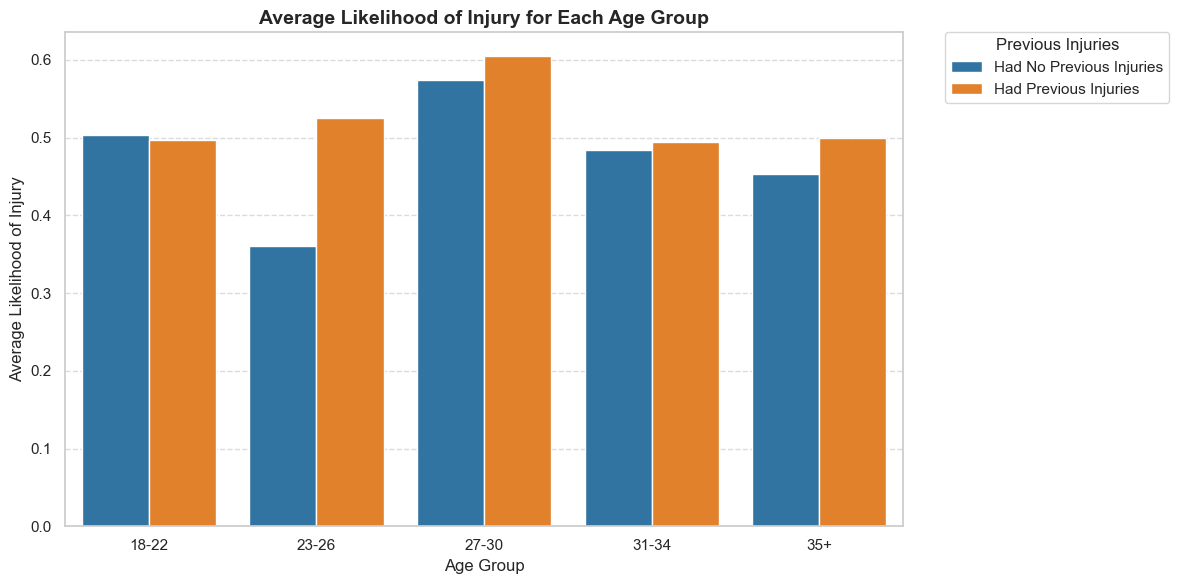

In [20]:
# Define your color palette
color_palette = {'Had No Previous Injuries': '#1f77b4', 'Had Previous Injuries': '#ff7f0e'}

# Calculate the average likelihood of injury for each age group and previous injuries status
avg_likelihood_by_age_group_and_previous_injuries = df.groupby(['Age_Group', 'Previous_Injuries'], observed=True)['Likelihood_of_Injury'].mean().reset_index()

# Plot bar plot of average likelihood of injury for each age group and previous injuries status
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Age_Group', y='Likelihood_of_Injury', 
            hue='Previous_Injuries', 
            data=avg_likelihood_by_age_group_and_previous_injuries,
            palette=color_palette.values()
            )
plt.title('Average Likelihood of Injury for Each Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Likelihood of Injury', fontsize=12)
handles, _ = count_plot.get_legend_handles_labels()
labels = ['Had No Previous Injuries', 'Had Previous Injuries']
plt.legend(handles, labels, title='Previous Injuries', 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Relationship Between Training Intensity and Likelihood of Injury

An integral part of injury prevention and management is understanding how training intensity affects the likelihood of injuries. A scatter plot with a regression line can help visualize this relationship. By plotting 'Training Intensity' on the x-axis and 'Likelihood of Injury' on the y-axis, we can observe whether a higher training intensity correlates with a greater likelihood of injury.

The regression line represents the best fit line through the data points and can indicate the trend. If the regression line slopes upward, this would suggest a positive relationship, meaning that higher training intensity could be associated with a higher risk of injury. Conversely, a flat or downward-sloping line would indicate little to no relationship or a negative relationship, respectively. This visual analysis is crucial for coaches and trainers who aim to balance training intensity with injury risk.


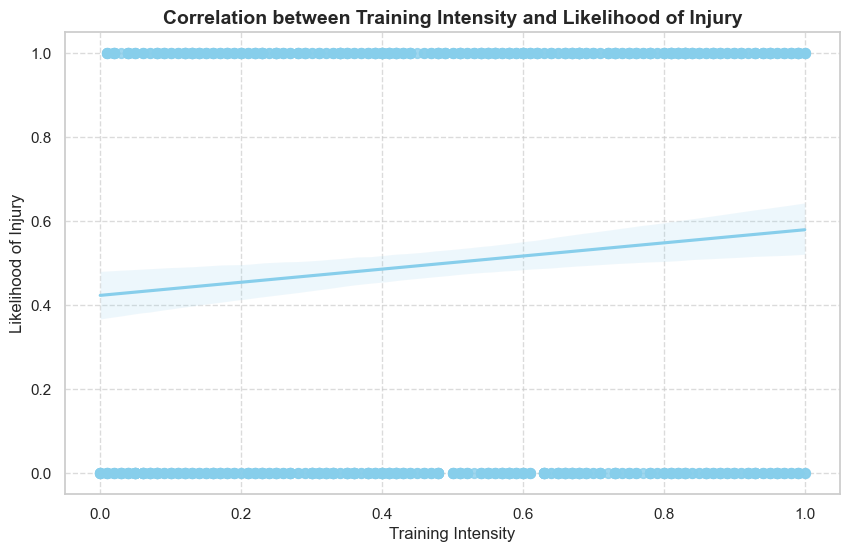

In [21]:
# Plot scatter plot of Training_Intensity vs Likelihood_of_Injury with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Training_Intensity', y='Likelihood_of_Injury', data=df, color='skyblue', scatter_kws={'s': 50})
plt.title('Correlation between Training Intensity and Likelihood of Injury', fontsize=14, fontweight='bold')
plt.xlabel('Training Intensity', fontsize=12)
plt.ylabel('Likelihood of Injury', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### BMI Category Distribution

Body Mass Index (BMI) is a simple index of weight-for-height that is commonly used to classify underweight, overweight, and obesity in adults. We classified the BMI of players and will now examine the distribution across these categories.

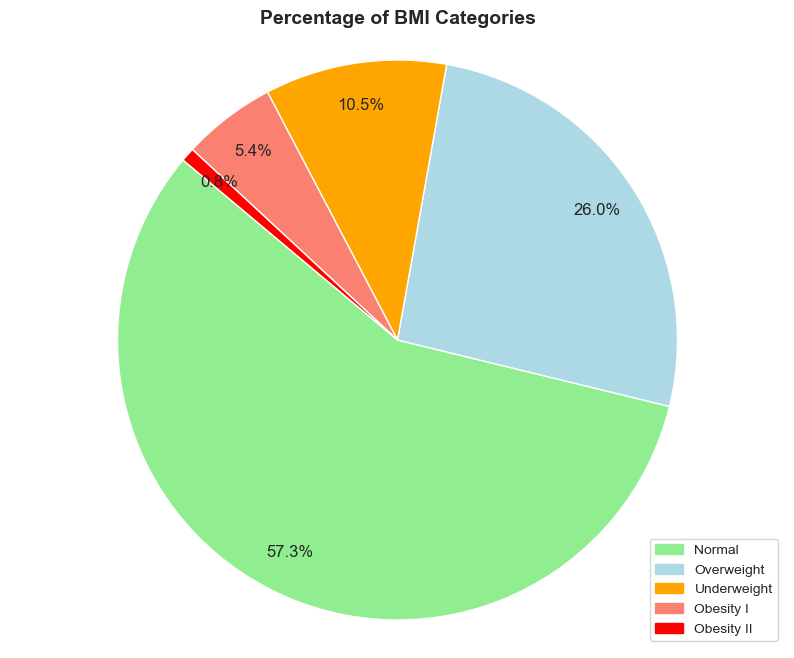

In [22]:
bmi_percentage = df['BMI_Classification'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 8))
pie = plt.pie(bmi_percentage, labels=None, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'orange', 'salmon', 'red', 'darkred'], pctdistance=0.85)
plt.title('Percentage of BMI Categories', fontsize=14, fontweight='bold')
plt.axis('equal')

# Add legend showing colors
legend_labels = bmi_percentage.index
colors = ['lightgreen', 'lightblue', 'orange', 'salmon', 'red', 'darkred']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, loc='lower right', fontsize=10)
plt.show()

### BMI and Age Relationships

In the plot below, we examine the relationship between `Player_Age` and `BMI`. The points are colored based on the `Likelihood_of_Injury`, allowing us to see if there are any apparent trends in injury risk across different ages and BMI values. For instance, we might be able to discern if older players with higher BMI are more prone to injuries, or if the trend is non-specific to these features. Such insights could be valuable for targeted injury prevention programs.


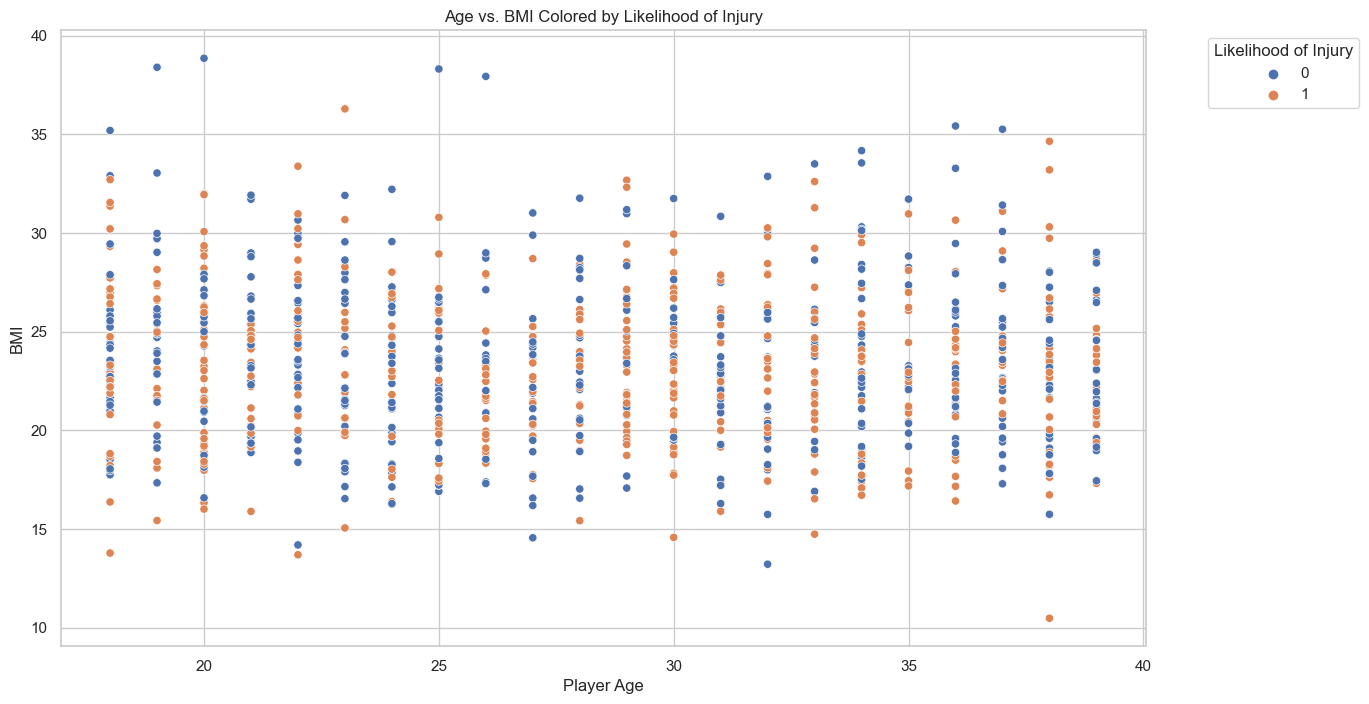

In [23]:
# Scatter Plot to Examine Relationships
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Player_Age', y='BMI', hue='Likelihood_of_Injury', data=df)
plt.title('Age vs. BMI Colored by Likelihood of Injury')
plt.xlabel('Player Age')
plt.ylabel('BMI')
plt.legend(title='Likelihood of Injury', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()



### Preprocessing: Encoding Categorical Variables

Machine learning models typically require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. The one-hot encoding technique converts categorical variables into a form that could be provided to ML algorithms. We apply this technique to the `BMI_Classification` and `Age_Group` columns, which are categorical.


In [24]:
# Apply OneHotEncoder to categorical columns
one_hot_cols = ["BMI_Classification", "Age_Group"]
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[one_hot_cols]).toarray(), 
                          columns=encoder.get_feature_names_out(one_hot_cols))

# Concatenate encoded features with the original dataframe
df_final = pd.concat([df.drop(columns=one_hot_cols), df_encoded], axis=1)


### Exploratory Data Analysis: Correlation Analysis

A crucial step in EDA is to understand the relationships between the different variables in our dataset. The correlation matrix is a powerful tool to visualize these relationships. Each cell in the matrix shows the correlation between two variables. A positive correlation indicates that as one variable increases, so does the other, whereas a negative correlation indicates that as one variable increases, the other decreases.

We are particularly interested in the correlation of features with our target variable, `Likelihood_of_Injury`, because features with stronger correlations are potentially good predictors for our model.


#### Heatmap of Correlation Matrix

The heatmap is an excellent visual tool to see the extent of correlation between all variables in one glance. Warmer colors represent higher positive correlation, while cooler colors represent higher negative correlation. Variables that are highly correlated can influence the model similarly, and thus we might need to consider multicollinearity in our model.


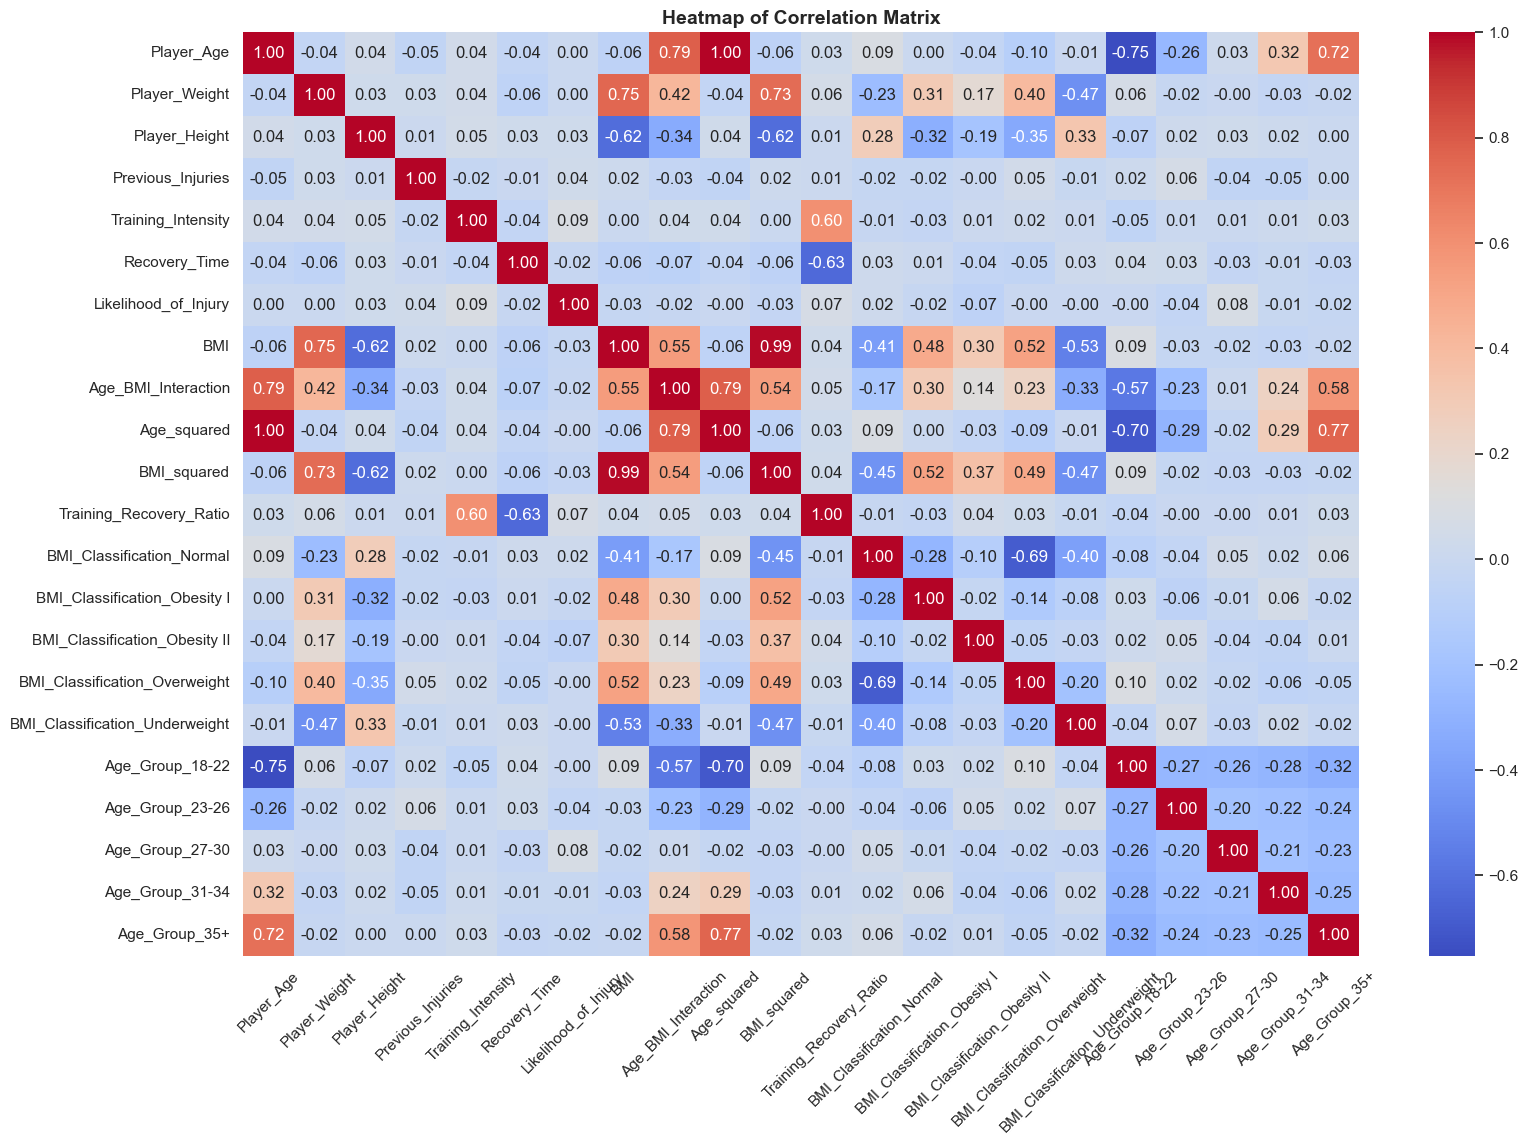

In [25]:
# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Correlation with Likelihood of Injury

To better understand how each feature individually correlates with the likelihood of injury, we visualize these relationships using a bar plot. This direct comparison might help us in feature selection by choosing those features that have a more significant correlation with the outcome we are trying to predict.


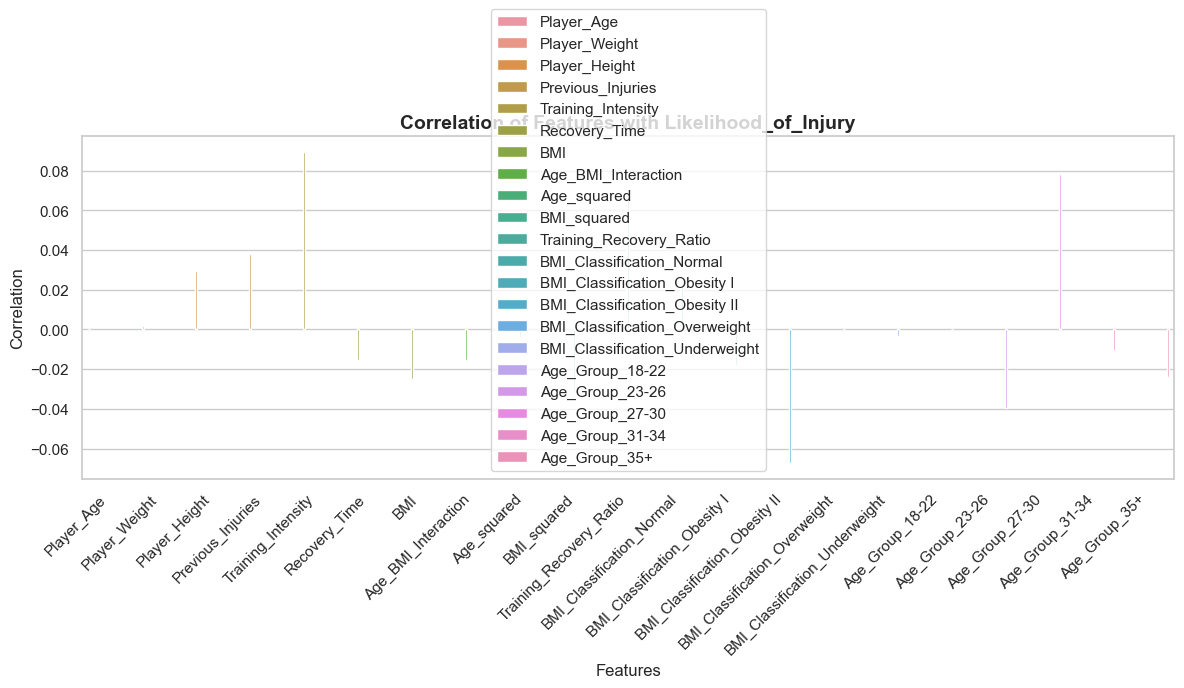

In [26]:
# Plot bar plot of correlation with Likelihood_of_Injury
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_matrix['Likelihood_of_Injury'].drop('Likelihood_of_Injury').index, 
            y=correlation_matrix['Likelihood_of_Injury'].drop('Likelihood_of_Injury').values, 
            hue=correlation_matrix['Likelihood_of_Injury'].drop('Likelihood_of_Injury').index)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Likelihood_of_Injury', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Modeling

The modeling stage is a pivotal step in our machine learning project. It involves selecting suitable algorithms and using them to train models on our dataset. The goal is to create models that can generalize well from the training data to unseen data.

Each model's performance is evaluated using cross-validation, which helps ensure that our evaluation is as unbiased as possible, given the available data. The results from the cross-validation process will guide us in selecting the best-performing model and tuning it further to improve accuracy.


## Model Evaluation Setup

Before we dive into model evaluation, we need to prepare our features and target variable. We also need to define numerical and categorical pipelines to ensure our data is processed correctly. This will involve scaling numerical features to a common scale and encoding categorical features into numeric values suitable for model training.


In [27]:
# Features and target
features = df.drop(columns=['Likelihood_of_Injury'])
target = df['Likelihood_of_Injury']

# Define numerical and categorical pipelines
numeric_features = ['Player_Age', 'Player_Weight', 'Player_Height', 'Training_Intensity', 'BMI']
categorical_features = ['BMI_Classification', 'Age_Group']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## Classifier Definitions

Here, we define several different classifiers for our evaluation.

- **Random Forest**: An ensemble method that builds multiple decision trees and merges their predictions. It's known for its robustness and accuracy, especially in cases where the dataset might not be linearly separable.
- **Gradient Boosting**: Another ensemble technique that builds the model in stages. It allows for the optimization of arbitrary differentiable loss functions, making it flexible and powerful in handling various types of data.
- **Support Vector Machine (SVM)**: An algorithm that finds the hyperplane that best separates classes in the feature space. It's effective in high-dimensional spaces and is versatile as it can be used with different kernel functions.
- **Logistic Regression**: A simple yet efficient linear classifier that predicts the probability of a binary outcome. It's a good baseline model due to its simplicity and interpretability.

We will use these classifiers to create a baseline for our model's performance.

In [28]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

## Model Evaluation Function

To evaluate our models, we create a function that will use Stratified K-Fold cross-validation. This method ensures that each fold of our dataset has the same proportion of observations with a given label.

In [29]:
# Function to evaluate models
def evaluate_models(models, X, y, folds=5):
    results = {}
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        cv_results = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
        results[name] = np.mean(cv_results)
        print(f"{name}: Mean CV Accuracy = {np.mean(cv_results):.4f} (±{np.std(cv_results):.4f})")
    return results

## Model Evaluation

With our models and evaluation function ready, let's evaluate the models using cross-validation. We will compare their accuracy to determine which model performs best at predicting the likelihood of injury.

In [30]:
# Evaluate all models
model_results = evaluate_models(classifiers, features, target)

Random Forest: Mean CV Accuracy = 0.4920 (±0.0129)
Gradient Boosting: Mean CV Accuracy = 0.4980 (±0.0166)
SVM: Mean CV Accuracy = 0.4890 (±0.0299)
Logistic Regression: Mean CV Accuracy = 0.5260 (±0.0242)


### Analysis of Model Performance

After running cross-validation on our four chosen models, we have obtained the following mean accuracy scores:

- Random Forest: Mean CV Accuracy = 0.4900 (±0.0138)
- Gradient Boosting: Mean CV Accuracy = 0.5170 (±0.0248)
- SVM: Mean CV Accuracy = 0.4890 (±0.0299)
- Logistic Regression: Mean CV Accuracy = 0.5250 (±0.0243)

From these results, we can draw several conclusions:

1. **Comparative Performance**: The Logistic Regression model has the highest mean accuracy score (0.5250), suggesting that it might be the best model of the ones we evaluated for predicting the likelihood of injury. 

2. **Consistency Across Folds**: The standard deviation of the cross-validation scores provides an insight into the model's consistency across different data splits. A lower standard deviation indicates that the model's performance is more consistent. The Random Forest model has the lowest standard deviation (±0.0138), indicating that its performance is relatively stable across different subsets of the data.

3. **Complexity vs. Performance**: More complex models, like Random Forest and Gradient Boosting, do not necessarily outperform simpler models. In this case, Logistic Regression, which is generally considered less complex, has performed slightly better.

4. **SVM's Performance**: The SVM model has the lowest mean accuracy and the highest standard deviation, suggesting that its performance is both lower on average and more varied across different data splits compared to the other models.

5. **Need for Further Tuning**: While Logistic Regression performs best on mean accuracy, the overall performance of all models is relatively close. This suggests that there might be room for hyperparameter tuning, feature engineering, or even data preprocessing steps that could significantly impact the performance.


## Visualization of Model Performance

After evaluating the models, it's helpful to visualize their performance. A bar plot with error bars representing the standard deviation of the cross-validation scores will allow us to easily compare the mean accuracy of each model.

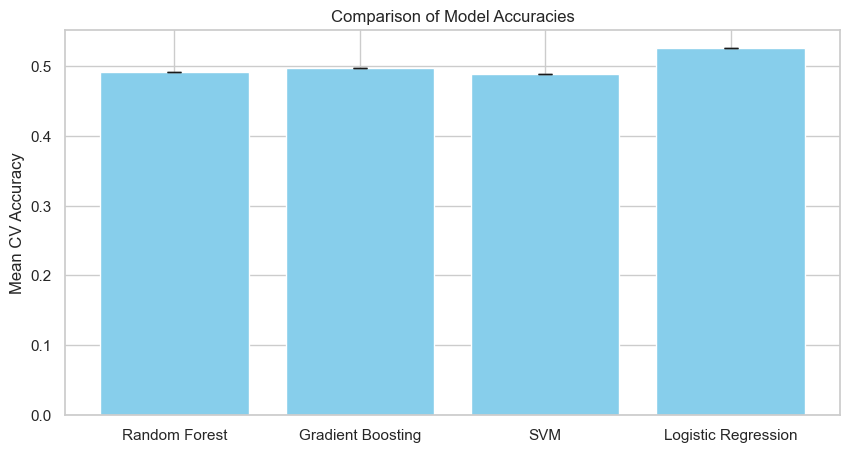

In [31]:
# Plotting the results
plt.figure(figsize=(10, 5))
model_names = list(model_results.keys())
mean_scores = [np.mean(scores) for scores in model_results.values()]
errors = [np.std(scores) for scores in model_results.values()]

plt.bar(model_names, mean_scores, yerr=errors, capsize=5, color='skyblue')
plt.ylabel('Mean CV Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

## Model Optimization: Logistic Regression

Given that Logistic Regression has shown promise in the preliminary evaluation, we will now focus on optimizing this model. Hyperparameter tuning is crucial as it can significantly improve a model's performance. We will use `GridSearchCV` to search across a predefined grid of hyperparameters and find the best combination for our Logistic Regression model.


In [32]:
# Preprocessing
numeric_features = ['Player_Age', 'Player_Weight', 'Player_Height', 'Training_Intensity', 'BMI', 'Age_BMI_Interaction', 'Age_squared', 'BMI_squared', 'Training_Recovery_Ratio']
categorical_features = ['BMI_Classification', 'Age_Group']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Pipeline setup
logreg = LogisticRegression(max_iter=1000, random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

## Hyperparameter Tuning

We set up `GridSearchCV` with a range of hyperparameter values for regularization strength (`C`) and type of penalty (`penalty`). The grid search will exhaustively generate combinations from these hyperparameters to find the best performer.

In [33]:
# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

## Data Splitting

Before we proceed with the grid search, we split our dataset into training and testing subsets. This ensures that we have a set of data that the model has never seen before, which we can use to evaluate the generalization performance of our optimized model.

In [34]:
# Prepare data
features = df.drop(columns=['Likelihood_of_Injury'])
target = df['Likelihood_of_Injury']

# Train and evaluate
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Running Grid Search

With the grid search set up and data split, we can now fit the grid search to the training data. This process may take some time as it will cross-validate the different combinations of hyperparameters to find the best ones.


In [35]:
# Execute the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score obtained
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy: {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters found: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best cross-validated accuracy: 0.531


c:\Python\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params

## Testing the Optimized Model

After finding the best hyperparameters, it's time to test how well our optimized Logistic Regression model performs on the test data, which simulates how the model might perform on unseen data.


In [36]:
# Evaluate on test data
y_pred = grid_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.565
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.69      0.60        95
           1       0.62      0.45      0.52       105

    accuracy                           0.56       200
   macro avg       0.58      0.57      0.56       200
weighted avg       0.58      0.56      0.56       200



## Model Improvement: Investment Classification Function

To add practical value to our model, we've created a function that classifies the investment quality of a player based on the likelihood of injury and other factors. This step represents model deployment where we use the model's predictions to make actionable decisions.


### Feature Engineering for Model Insights

Before we can utilize our `classify_investment` function, we must ensure our DataFrame includes all necessary calculations. This step involves feature engineering where we calculate additional features like `BMI` and `Training_Recovery_Ratio`. These features can provide deeper insights into a player's risk factors and help in our investment classification.


In [37]:
# Assuming df is your DataFrame and it already has the necessary columns computed.
# Here's an example of adding necessary calculations to the DataFrame:

# Sample data setup (for demonstration)
data = {
    'Likelihood_of_Injury': [0,1, 1],
    'Previous_Injuries': [0, 0, 1],
    'Player_Age': [28, 36, 40],
    'Player_Weight': [70, 80, 90],
    'Player_Height': [180, 175, 165],
    'Training_Intensity': [8, 6, 5],
    'Recovery_Time': [2,4, 3]
}
test_df = pd.DataFrame(data)

# Calculate BMI and Training Recovery Ratio
test_df['BMI'] = test_df['Player_Weight'] / (test_df['Player_Height'] / 100) ** 2
test_df['Training_Recovery_Ratio'] = test_df['Training_Intensity'] / test_df['Recovery_Time'].replace(0, np.nan)

### Investment Classification

We apply a classification function to our dataset to label each player as an 'Excellent', 'Good', or 'Bad' investment based on certain criteria. This classification is a form of risk assessment that can inform decisions in a practical scenario, such as scouting athletes for a team.

In [38]:
def classify_investment(row):
    if (row['Likelihood_of_Injury'] == 0 and
        row['Previous_Injuries'] == 0 and
        row['Player_Age'] <= 30 and
        23.07 - 4.01 <= row['BMI'] <= 23.07 + 4.01 and
        row['Training_Recovery_Ratio'] > 0.249):
        return 'Excellent investment'
    elif (row['Likelihood_of_Injury'] == 1 and
          row['Previous_Injuries'] == 1 and
          row['Player_Age'] <= 35 and
          19.05 <= row['BMI'] <= 27.08 and
          0.141 <= row['Training_Recovery_Ratio'] <= 0.249):
        return 'Good investment'
    else:
        return 'Bad investment'
    
# Apply the classification function to the dataset
test_df['Investment_Rating'] = test_df.apply(classify_investment, axis=1)

### Displaying the Classified Data

Finally, we display the results of our investment classification. This step confirms that our DataFrame includes our new features and shows the investment ratings for each player, providing a clear output of our model's application.


In [39]:
# Display the DataFrame with the newly computed features and the investment classification
print(test_df[['Likelihood_of_Injury', 'Previous_Injuries', 'Player_Age', 'BMI', 'Training_Recovery_Ratio', 'Investment_Rating']])


   Likelihood_of_Injury  Previous_Injuries  Player_Age        BMI  \
0                     0                  0          28  21.604938   
1                     1                  0          36  26.122449   
2                     1                  1          40  33.057851   

   Training_Recovery_Ratio     Investment_Rating  
0                 4.000000  Excellent investment  
1                 1.500000        Bad investment  
2                 1.666667        Bad investment  


# Plot histograms for BMI and Training Recovery Ratio

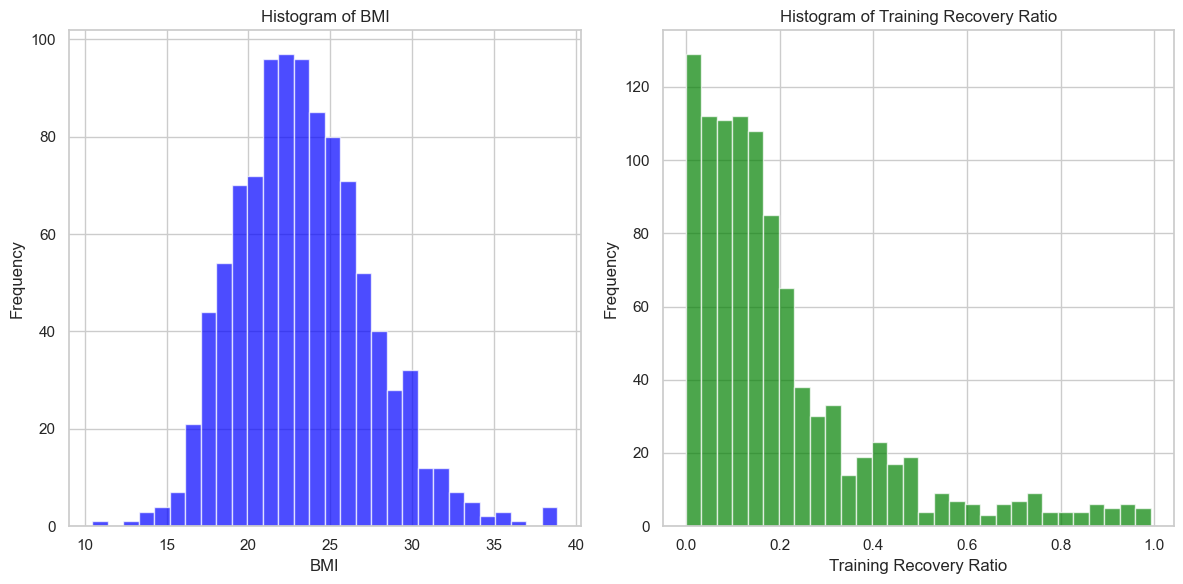

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df['BMI'].hist(ax=axes[0], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of BMI')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

df['Training_Recovery_Ratio'].hist(ax=axes[1], bins=30, color='green', alpha=0.7)
axes[1].set_title('Histogram of Training Recovery Ratio')
axes[1].set_xlabel('Training Recovery Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BMI: The distribution appears relatively normal with a mean of about 23.35 and a standard deviation of 4.01. A common categorization might set "Excellent" for players with a BMI close to the median (23.07), indicating a typical body composition.
>Training Recovery Ratio: This metric is skewed towards lower values with a mean of 0.204. Higher ratios indicate better recovery given the same training intensity, which might be desirable for categorizing as "Excellent".

To divide the players into three groups (Excellent, Good, and Bad investment), we can use the following tentative criteria:

>**Excellent Investment:**
>BMI close to the median (23.07 ± 1 standard deviation).
>Training Recovery Ratio in the top 25% (>0.249).

>**Good Investment:**
>BMI within ±1 to ±2 standard deviations from the median (19.05 to 27.08).
>Training Recovery Ratio between the 50th percentile and 75th percentile (0.141 to 0.249).

>**Bad Investment:**
>BMI outside ±2 standard deviations from the median.
>Training Recovery Ratio below the 50th percentile (<0.141).

Let's apply these thresholds to classify each player and see the distribution of groups. 

**The players have been categorized into the three investment groups as follows:**
>Excellent Investment: 173 players</br>
>Good Investment: 670 players</br>
>Bad Investment: 157 players</br>

This classification considers both the Body Mass Index (BMI) and the Training Recovery Ratio to assess each player's investment potential, with particular emphasis on their physical fitness and recovery capabilities in relation to their training intensity.

## Interactive Investment Classification

To facilitate the practical application of our predictive model, we have developed an interactive interface using `ipywidgets`. This interface allows us to adjust various player attributes using sliders and immediately classify the investment quality of a player based on our model.

Here's a breakdown of the components in our interactive setup:

- **Sliders for Player Attributes**: Adjust values for the likelihood of injury, previous injuries, player age, weight, height, training intensity, and recovery time. These sliders have been initialized with default values that reflect an 'Excellent investment' scenario.
  
- **Output Area**: A dedicated space to display the classification result after the calculation. It provides immediate feedback on the classification output when the 'Classify Investment' button is pressed.
  
- **'Classify Investment' Button**: Once clicked, it triggers the classification process. It uses the current values from the sliders, calculates the necessary metrics like BMI and Training Recovery Ratio, and then applies the `classify_investment` function to output whether the player is an 'Excellent', 'Good', or 'Bad' investment.

This interactive tool exemplifies how our predictive model can be applied in a user-friendly way, enabling non-technical stakeholders to leverage its insights for practical decision-making.

To use the interface, adjust the sliders to your desired values and click the 'Classify Investment' button to see the model's assessment.


In [41]:
# Widget layout settings
full_width_layout = widgets.Layout(width='100%')

# Create interactive widgets with full width and adjusted default values for an 'Excellent investment'
likelihood_of_injury = widgets.IntSlider(value=0, min=0, max=1, step=1, description='Likelihood of Injury:', layout=full_width_layout)
previous_injuries = widgets.IntSlider(value=0, min=0, max=1, step=1, description='Previous Injuries:', layout=full_width_layout)
player_age = widgets.IntSlider(value=30, min=18, max=50, step=1, description='Player Age:', layout=full_width_layout)
player_weight = widgets.FloatSlider(value=80, min=50, max=150, step=0.1, description='Player Weight (kg):', layout=full_width_layout)
player_height = widgets.FloatSlider(value=185, min=140, max=220, step=0.1, description='Player Height (cm):', layout=full_width_layout)
training_intensity = widgets.FloatSlider(value=7, min=1, max=10, step=0.1, description='Training Intensity:', layout=full_width_layout)
recovery_time = widgets.FloatSlider(value=2, min=0, max=6, step=1, description='Recovery Time (days):', layout=full_width_layout)
output_area = widgets.Output(layout={'border': '1px solid black', 'width': '100%'})

# Button to perform classification
classify_button = widgets.Button(description="Classify Investment", layout=full_width_layout)

# Function to handle button click
def on_classify_button_clicked(b):
    # Calculate BMI and Training Recovery Ratio
    bmi = player_weight.value / (player_height.value / 100) ** 2
    training_recovery_ratio = training_intensity.value / recovery_time.value
    
    # Create data dictionary
    player_data = {
        'Likelihood_of_Injury': likelihood_of_injury.value,
        'Previous_Injuries': previous_injuries.value,
        'Player_Age': player_age.value,
        'BMI': bmi,
        'Training_Recovery_Ratio': training_recovery_ratio
    }
    
    # Classify investment and display result
    investment_rating = classify_investment(player_data)
    with output_area:
        clear_output(wait=True)
        print(f"Investment Rating: {investment_rating}")

# Register the button click event
classify_button.on_click(on_classify_button_clicked)

# Display widgets
display(widgets.VBox([
    likelihood_of_injury,
    previous_injuries,
    player_age,
    player_weight,
    player_height,
    training_intensity,
    recovery_time,
    classify_button,
    output_area
]))

# Source Code

https://github.com/rafael21089/AAM_21089_9950_4561

# Conclusion

Through this project, we have undertaken the following key steps to predict the likelihood of injury in players:

1. **Data Preparation**: Our initial data was preprocessed and prepared, ensuring that it was clean and formatted correctly for use in machine learning models. This involved handling missing values, encoding categorical variables, and normalizing numerical features.

2. **Exploratory Data Analysis**: We conducted a thorough EDA, which revealed some initial insights into the relationships between players ages, weights, heights, and BMIs with their likelihood of injury.

3. **Model Evaluation**: We assessed several machine learning models, including Random Forest, Gradient Boosting, SVM, and Logistic Regression, using cross-validation to estimate their performance. Logistic Regression showed a slight edge in mean accuracy, indicating it might be the most suitable model for this dataset.

4. **Model Optimization**: Further fine-tuning on the Logistic Regression model was performed using `GridSearchCV`, leading to optimized hyperparameters that improved the model's predictive performance.

5. **Investment Classification**: By creating a custom function, we classified players into different investment categories based on the model's predictions and other criteria. This final step demonstrated how the model's insights could be applied to make real-world decisions.

The models' performances were modest, with the best model achieving around 52% accuracy. This suggests the challenge in predicting injuries based on the data provided and points to the multifactorial nature of sports injuries, where context and unmeasured variables play significant roles.

## Potential Future Work and Improvements

- **Data Enrichment**: Incorporating more context-specific data, such as player performance metrics, environmental factors, and historical injury details, could enhance the model's predictive capacity.
- **Advanced Feature Engineering**: Exploring more sophisticated feature interactions and transformations may uncover patterns not captured by the current model.
- **Alternative Models**: Investigating more complex models or deep learning approaches, which can capture non-linear relationships and interactions between a larger number of features.
- **Deployment and Monitoring**: Developing a pipeline for real-time prediction and monitoring the model's performance over time would be essential for practical application, allowing for adjustments and updates as new data comes in.

In conclusion, this project provides a foundation for using machine learning to assess injury risk, but it also underscores the complexity of injury prediction and the need for continued research and development in this field.
